# 1. Importing libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2. Loading dataset

In [63]:
df = pd.read_csv("dataset/Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


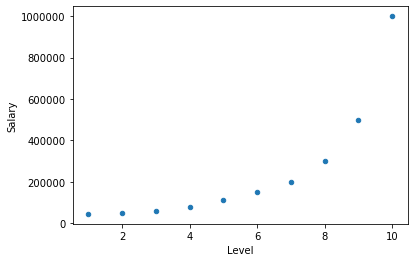

In [64]:
df.plot.scatter(x="Level", y="Salary")

# 3. Splitting data into train/test

In [65]:
np.random.seed(0)
X = df["Level"].values  
y = df["Salary"].values

X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X = scalerX.fit_transform(X)
y = scalerY.fit_transform(y)

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

# 4. Polynomial regression with degree = 2

In [68]:
poly_ftrs_d2 = PolynomialFeatures(degree=2)

X_train_d2 = poly_ftrs_d2.fit_transform(X_train)
X_test_d2 = poly_ftrs_d2.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_d2,y_train)

y_pred_d2 = poly_reg.predict(X_test_d2)

MSE_d2 = mean_squared_error(y_test,y_pred_d2)
MAE_d2 = mean_absolute_error(y_test,y_pred_d2)
R2_d2 = r2_score(y_test,y_pred_d2)

evalmetrics = pd.DataFrame(data = [MSE_d2, MAE_d2, R2_d2],
                          columns=["d=2"], index=["MSE", "MAE", "R²"])

evalmetrics

,d=2
MSE,0.013065
MAE,0.095716
R²,-0.128849


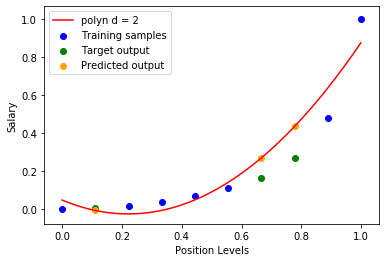

In [69]:

X_poly_disp = np.arange(0,1,0.001).reshape(-1, 1)
plt.scatter(X_train,y_train,color="blue", label="Training samples")  
plt.scatter(X_test,y_test,color="green", label="Target output")  
plt.plot(X_poly_disp,poly_reg.predict(poly_ftrs_d2.fit_transform(X_poly_disp)), color="red", label="polyn d = 2")  
plt.scatter(X_test,y_pred_d2, color = "orange", label="Predicted output")  
plt.xlabel("Position Levels")  
plt.ylabel("Salary")  
plt.legend()

plt.show()

# 5. Polynomial regression with degree = 3

In [58]:
poly_ftrs_d3 = PolynomialFeatures(degree=3)

X_train_d3 = poly_ftrs_d3.fit_transform(X_train)
X_test_d3 = poly_ftrs_d3.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_d3,y_train)

y_pred_d3 = poly_reg.predict(X_test_d3)

MSE_d3 = mean_squared_error(y_test,y_pred_d3)
MAE_d3 = mean_absolute_error(y_test,y_pred_d3)
R2_d3 = r2_score(y_test,y_pred_d3)


evalmetrics["d=3"] = [MSE_d3, MAE_d3, R2_d3]
evalmetrics

,d=2,d=3,d=5
MSE,0.013065,0.001051,0.000125
MAE,0.095716,0.031365,0.009949
R²,-0.128849,0.909204,0.989215


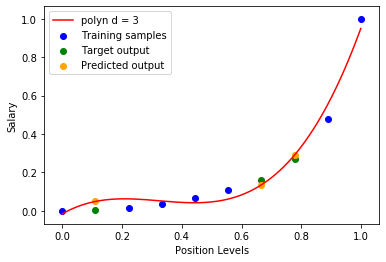

In [59]:
X_poly_disp = np.arange(0,1,0.001).reshape(-1, 1)
plt.scatter(X_train,y_train,color="blue", label="Training samples")  
plt.scatter(X_test,y_test,color="green", label="Target output")  
plt.plot(X_poly_disp,poly_reg.predict(poly_ftrs_d3.fit_transform(X_poly_disp)), color="red", label="polyn d = 3")  
plt.scatter(X_test,y_pred_d3, color = "orange", label="Predicted output")  
plt.xlabel("Position Levels")  
plt.ylabel("Salary")  
plt.legend()

plt.show()

the values are scaled, it's not important because the scaler function respects the distribution of the data

# 6. Polynomial regression with degree = 5

In [55]:
poly_ftrs_d5 = PolynomialFeatures(degree=5)

X_train_d5 = poly_ftrs_d5.fit_transform(X_train)
X_test_d5 = poly_ftrs_d5.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_d5,y_train)

y_pred_d5 = poly_reg.predict(X_test_d5)

MSE_d5 = mean_squared_error(y_test,y_pred_d5)
MAE_d5 = mean_absolute_error(y_test,y_pred_d5)
R2_d5 = r2_score(y_test,y_pred_d5)


evalmetrics["d=5"] = [MSE_d5, MAE_d5, R2_d5]
evalmetrics

,d=2,d=3,d=5
MSE,0.013065,0.001051,0.000125
MAE,0.095716,0.031365,0.009949
R²,-0.128849,0.909204,0.989215


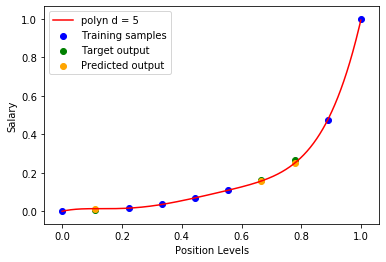

In [56]:
X_poly_disp = np.arange(0,1,0.001).reshape(-1, 1)
plt.scatter(X_train,y_train,color="blue", label="Training samples")  
plt.scatter(X_test,y_test,color="green", label="Target output")  
plt.plot(X_poly_disp,poly_reg.predict(poly_ftrs_d5.fit_transform(X_poly_disp)), color="red", label="polyn d = 5")  
plt.scatter(X_test,y_pred_d5, color = "orange", label="Predicted output")  
plt.xlabel("Position Levels")  
plt.ylabel("Salary")  
plt.legend()

plt.show()

# 7. Comparing performances of all three models

In [60]:
y_test = scalerY.inverse_transform(y_test)
y_pred_d2 = scalerY.inverse_transform(y_pred_d2)
y_pred_d3 = scalerY.inverse_transform(y_pred_d3)
y_pred_d5 = scalerY.inverse_transform(y_pred_d5)

In [61]:
TestingData=pd.DataFrame(data=y_test, columns=["actual Salary"])
TestingData['d=2']=y_pred_d2
TestingData['d=3']=y_pred_d3
TestingData['d=5']=y_pred_d5

TestingData

,actual Salary,d=2,d=3,d=5
0,300000.0,459299.397920,322866.778920,283901.807835
1,200000.0,300859.940400,173855.855539,195445.838546
2,50000.0,35934.136107,90851.022452,57850.418230
